In [5]:
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.11.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-2-abd071da597f>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['x'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-abd071da597f>:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['y'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-2-abd071da597f>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['z'], 'r.', label='z', linestyle='solid', marker=',')


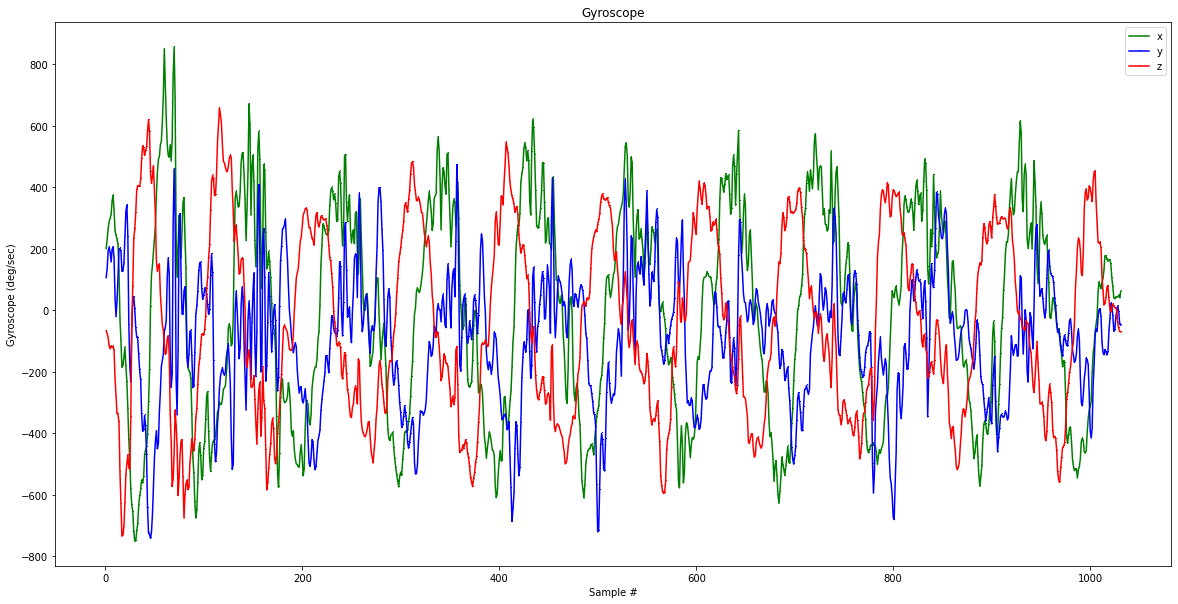

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "circulos.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['x']) + 1)

plt.rcParams["figure.figsize"] = (20,10)



plt.plot(index, df['x'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['y'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['z'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "circulos",
    "arribaAbajo",
    "extensionCodo",
]

SAMPLES_PER_GESTURE = 146

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['x'][index] + 2000) / 4000,
          (df['y'][index] + 2000) / 4000,
          (df['z'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)
print("inputs:",inputs)
print("Out", outputs)
print("Data set parsing and preparation complete.")

TensorFlow version = 2.11.0

Processing index 0 for gesture 'circulos'.
	There are 7 recordings of the circulos gesture.
Processing index 1 for gesture 'arribaAbajo'.
	There are 7 recordings of the arribaAbajo gesture.
Processing index 2 for gesture 'extensionCodo'.
	There are 7 recordings of the extensionCodo gesture.
inputs: [[0.55025 0.52675 0.4835  ... 0.668   0.5075  0.468  ]
 [0.6505  0.494   0.45975 ... 0.401   0.44675 0.47025]
 [0.388   0.43925 0.48175 ... 0.569   0.466   0.43475]
 ...
 [0.53725 0.644   0.174   ... 0.504   0.532   0.50325]
 [0.537   0.5775  0.50775 ... 0.495   0.4335  0.6995 ]
 [0.49775 0.41775 0.7185  ... 0.48475 0.54875 0.322  ]]
Out [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Data set parsing and preparation complete.


In [4]:

# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")
print(inputs_validate);
print(outputs_validate)

Data set randomization and splitting complete.
[[0.368   0.496   0.51075 ... 0.33975 0.4805  0.52675]
 [0.49775 0.41775 0.7185  ... 0.48475 0.54875 0.322  ]
 [0.537   0.5775  0.50775 ... 0.495   0.4335  0.6995 ]
 [0.4155  0.49375 0.487   ... 0.34175 0.4765  0.50275]
 [0.3405  0.47325 0.50475 ... 0.36475 0.4945  0.51425]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [5]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Epoch 1/600
12/12 [==============================] - 1s 23ms/step - loss: 0.2900 - mae: 0.4426 - val_loss: 0.2943 - val_mae: 0.4968
Epoch 2/600
12/12 [==============================] - 0s 6ms/step - loss: 0.2301 - mae: 0.4208 - val_loss: 0.2824 - val_mae: 0.4925
Epoch 3/600
12/12 [==============================] - 0s 5ms/step - loss: 0.2172 - mae: 0.4058 - val_loss: 0.2620 - val_mae: 0.4789
Epoch 4/600
12/12 [==============================] - 0s 7ms/step - loss: 0.2227 - mae: 0.4381 - val_loss: 0.2836 - val_mae: 0.4926
Epoch 5/600
12/12 [==============================] - 0s 7ms/step - loss: 0.2202 - mae: 0.4263 - val_loss: 0.2835 - val_mae: 0.4931
Epoch 6/600
12/12 [==============================] - 0s 6ms/step - loss: 0.2047 - mae: 0.4165 - val_loss: 0.3617 - val_mae: 0.5376
Epoch 7/600
12/12 [==============================] - 0s 5ms/step - loss: 0.2258 - mae: 0.4150 - val_loss: 0.3041 - val_mae: 0.5058
Epoch 8/600
12/12 [==============================] - 0s 6ms/step - loss: 0.2154 - 

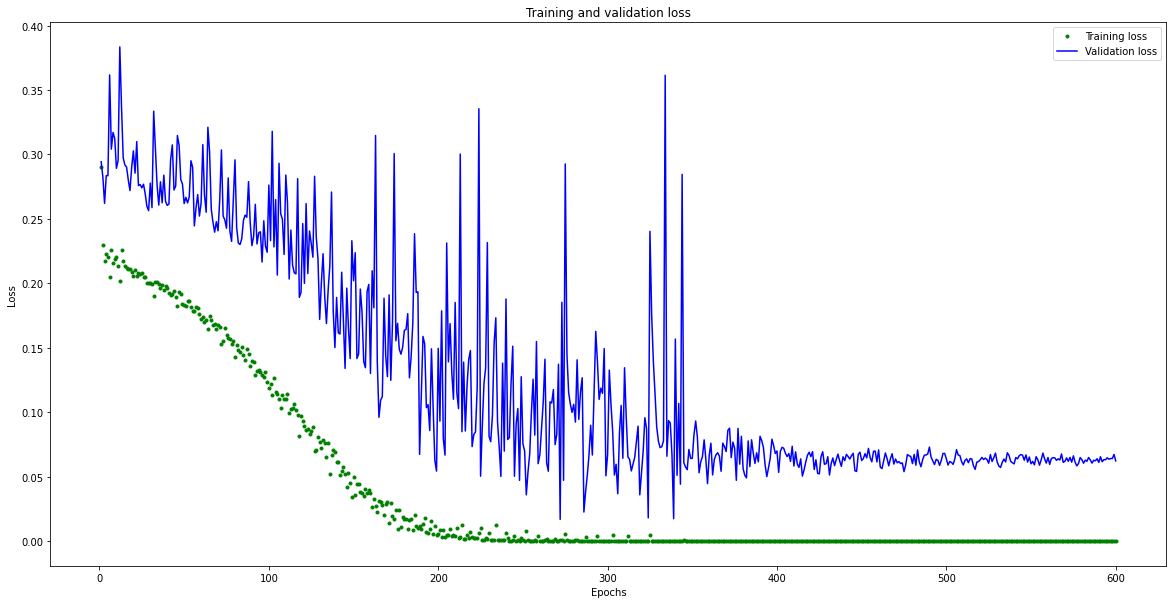

[20.0, 10.0]


In [6]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

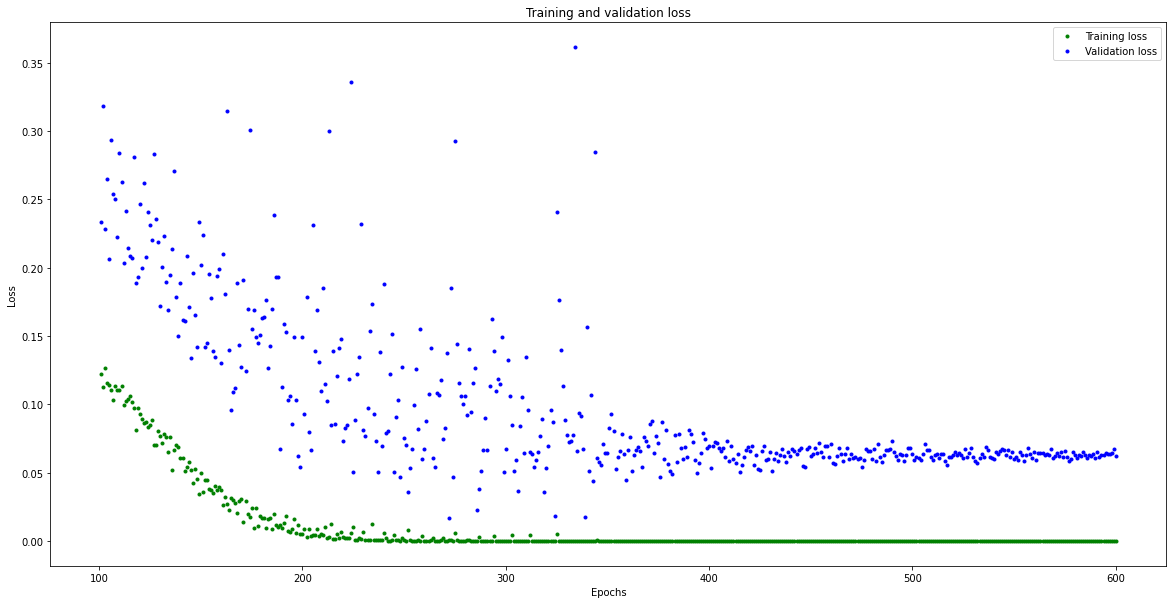

In [7]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

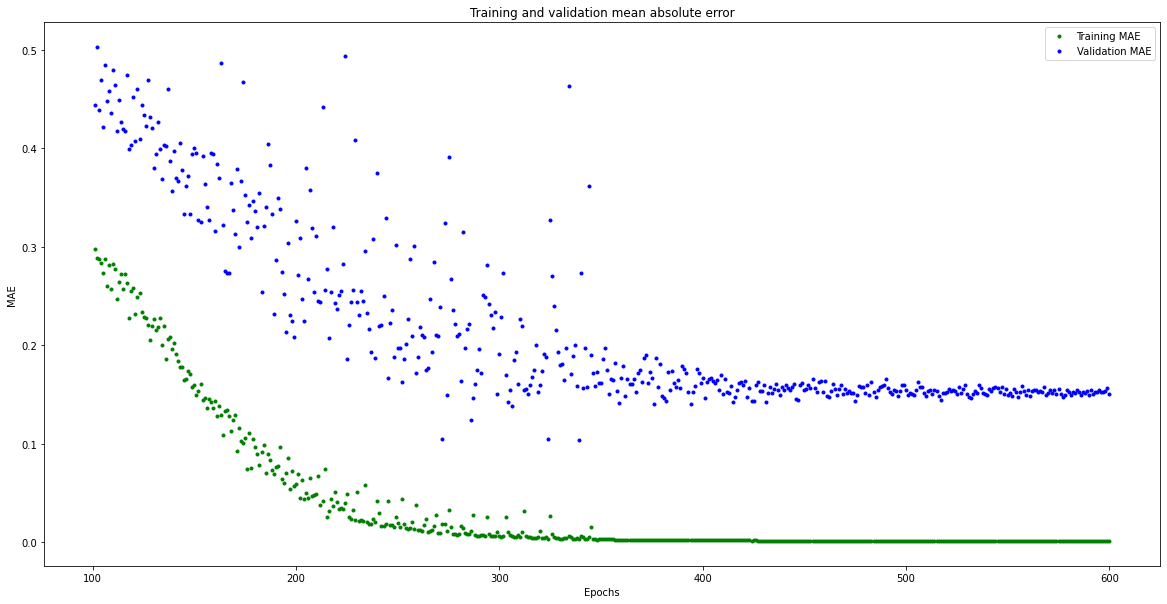

In [8]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 34ms/step
predictions =
 [[1.    0.    0.   ]
 [0.104 0.878 0.018]
 [1.    0.    0.   ]
 [0.998 0.002 0.   ]]
actual =
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


ValueError: ignored

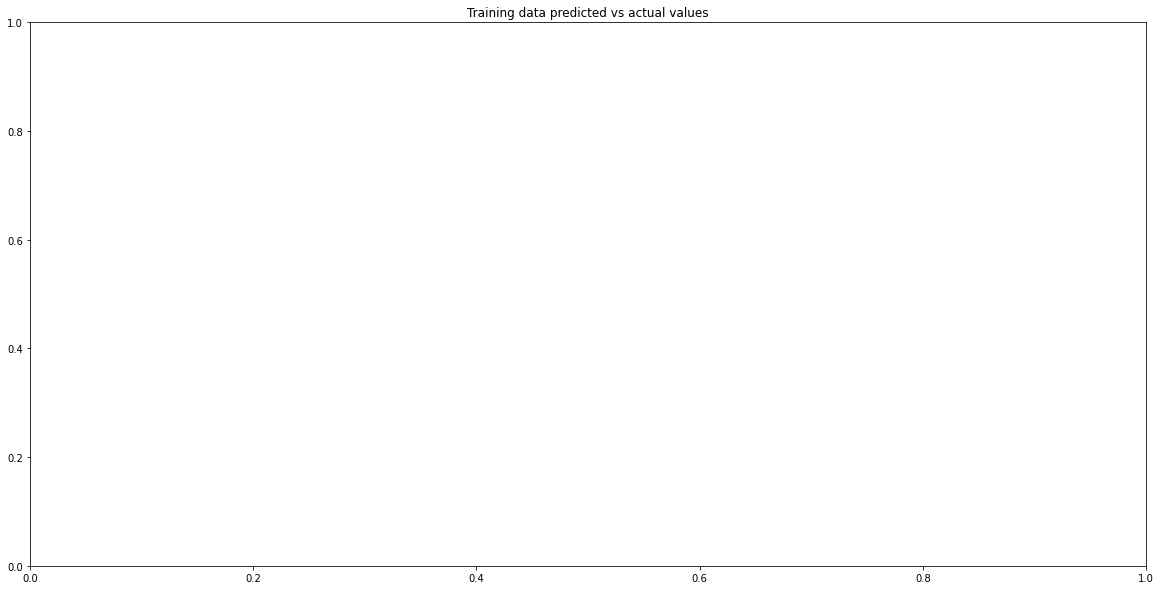

In [11]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')

plt.plot(2, outputs_test[0], 'b.', label='Actual')
#plt.plot(outputs_test, predictions, 'r.', label='Predicted')
plt.show()
     

In [12]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  

Model is 93144 bytes


# New Section